### Import Libraries

In [128]:
import pandas as pd
# import gdal
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import math
import sklearn
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures


### Load the dataset and remove the duplicates

In [129]:
dataset = pd.read_csv(r'C:\Users\avishek\Downloads\soil_feat_prop (2).csv')

removed_dup = dataset.drop_duplicates(subset=['Silt', 'Sand', 'OCD', 'Nitrogen', 'CFVO', 'BDOD', 'SOC', 'pH', 'Clay', 'Cation', 'evi2020', 'sm_2020', 'st_2020'], keep='first')
removed_dup

,ID,Longitude,Latitude,Fe,Cu,Silt,Sand,OCD,Nitrogen,CFVO,BDOD,SOC,pH,Clay,Cation,evi2020,sm_2020,st_2020
0,5,78.140200,10.069400,6.380,0.920,319.0,392.0,294.0,2619.0,134.0,146.0,321.0,72.0,289.0,296.0,1798.25,0.31443,299.70554
1,6,78.125500,10.076600,6.920,1.140,301.0,404.0,327.0,2663.0,94.0,147.0,312.0,70.0,295.0,301.0,3051.00,0.31434,299.65286
2,9,78.135500,10.073300,6.480,0.900,297.0,411.0,301.0,2475.0,118.0,151.0,308.0,72.0,292.0,299.0,2762.00,0.31450,299.66788
3,12,78.138300,10.064100,6.920,1.480,315.0,403.0,308.0,2378.0,142.0,146.0,331.0,73.0,283.0,294.0,1957.25,0.31420,299.74686
4,15,78.138000,10.074700,6.600,1.700,301.0,404.0,309.0,2578.0,104.0,147.0,296.0,71.0,295.0,301.0,3024.25,0.31455,299.66678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,3174,77.997503,10.011191,4.386,1.726,284.0,416.0,296.0,2843.0,99.0,147.0,295.0,71.0,300.0,280.0,4098.50,0.31286,300.13187
412,3175,77.996771,10.006013,5.626,0.984,294.0,429.0,308.0,3049.0,109.0,145.0,349.0,70.0,277.0,258.0,4299.75,0.31243,300.21530
413,3176,78.002854,10.020324,4.132,0.747,299.0,423.0,296.0,2434.0,97.0,152.0,330.0,70.0,278.0,282.0,3163.50,0.31380,299.95288
414,3177,77.996931,10.013756,6.218,1.000,287.0,414.0,307.0,2802.0,103.0,147.0,307.0,70.0,299.0,269.0,4309.50,0.31313,300.08920


In [130]:
removed_nan = removed_dup.dropna()
removed_nan

,ID,Longitude,Latitude,Fe,Cu,Silt,Sand,OCD,Nitrogen,CFVO,BDOD,SOC,pH,Clay,Cation,evi2020,sm_2020,st_2020
0,5,78.140200,10.069400,6.380,0.920,319.0,392.0,294.0,2619.0,134.0,146.0,321.0,72.0,289.0,296.0,1798.25,0.31443,299.70554
1,6,78.125500,10.076600,6.920,1.140,301.0,404.0,327.0,2663.0,94.0,147.0,312.0,70.0,295.0,301.0,3051.00,0.31434,299.65286
2,9,78.135500,10.073300,6.480,0.900,297.0,411.0,301.0,2475.0,118.0,151.0,308.0,72.0,292.0,299.0,2762.00,0.31450,299.66788
3,12,78.138300,10.064100,6.920,1.480,315.0,403.0,308.0,2378.0,142.0,146.0,331.0,73.0,283.0,294.0,1957.25,0.31420,299.74686
4,15,78.138000,10.074700,6.600,1.700,301.0,404.0,309.0,2578.0,104.0,147.0,296.0,71.0,295.0,301.0,3024.25,0.31455,299.66678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,3174,77.997503,10.011191,4.386,1.726,284.0,416.0,296.0,2843.0,99.0,147.0,295.0,71.0,300.0,280.0,4098.50,0.31286,300.13187
412,3175,77.996771,10.006013,5.626,0.984,294.0,429.0,308.0,3049.0,109.0,145.0,349.0,70.0,277.0,258.0,4299.75,0.31243,300.21530
413,3176,78.002854,10.020324,4.132,0.747,299.0,423.0,296.0,2434.0,97.0,152.0,330.0,70.0,278.0,282.0,3163.50,0.31380,299.95288
414,3177,77.996931,10.013756,6.218,1.000,287.0,414.0,307.0,2802.0,103.0,147.0,307.0,70.0,299.0,269.0,4309.50,0.31313,300.08920


### Create a correlation matrix

In [131]:
prop_var = removed_nan[['Fe', 'Cu', 'Silt', 'Sand', 'OCD', 'Nitrogen', 'CFVO', 'BDOD', 'SOC', 'pH', 'Clay', 'Cation', 'evi2020', 'sm_2020', 'st_2020']]
prop_var.corr()
print(prop_var)

        Fe     Cu   Silt   Sand    OCD  Nitrogen   CFVO   BDOD    SOC    pH  \
0    6.380  0.920  319.0  392.0  294.0    2619.0  134.0  146.0  321.0  72.0   
1    6.920  1.140  301.0  404.0  327.0    2663.0   94.0  147.0  312.0  70.0   
2    6.480  0.900  297.0  411.0  301.0    2475.0  118.0  151.0  308.0  72.0   
3    6.920  1.480  315.0  403.0  308.0    2378.0  142.0  146.0  331.0  73.0   
4    6.600  1.700  301.0  404.0  309.0    2578.0  104.0  147.0  296.0  71.0   
..     ...    ...    ...    ...    ...       ...    ...    ...    ...   ...   
411  4.386  1.726  284.0  416.0  296.0    2843.0   99.0  147.0  295.0  71.0   
412  5.626  0.984  294.0  429.0  308.0    3049.0  109.0  145.0  349.0  70.0   
413  4.132  0.747  299.0  423.0  296.0    2434.0   97.0  152.0  330.0  70.0   
414  6.218  1.000  287.0  414.0  307.0    2802.0  103.0  147.0  307.0  70.0   
415  5.400  1.160  291.0  430.0  314.0    2653.0   97.0  149.0  302.0  70.0   

      Clay  Cation  evi2020  sm_2020    st_2020  
0

In [132]:
prop_var

,Fe,Cu,Silt,Sand,OCD,Nitrogen,CFVO,BDOD,SOC,pH,Clay,Cation,evi2020,sm_2020,st_2020
0,6.380,0.920,319.0,392.0,294.0,2619.0,134.0,146.0,321.0,72.0,289.0,296.0,1798.25,0.31443,299.70554
1,6.920,1.140,301.0,404.0,327.0,2663.0,94.0,147.0,312.0,70.0,295.0,301.0,3051.00,0.31434,299.65286
2,6.480,0.900,297.0,411.0,301.0,2475.0,118.0,151.0,308.0,72.0,292.0,299.0,2762.00,0.31450,299.66788
3,6.920,1.480,315.0,403.0,308.0,2378.0,142.0,146.0,331.0,73.0,283.0,294.0,1957.25,0.31420,299.74686
4,6.600,1.700,301.0,404.0,309.0,2578.0,104.0,147.0,296.0,71.0,295.0,301.0,3024.25,0.31455,299.66678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,4.386,1.726,284.0,416.0,296.0,2843.0,99.0,147.0,295.0,71.0,300.0,280.0,4098.50,0.31286,300.13187
412,5.626,0.984,294.0,429.0,308.0,3049.0,109.0,145.0,349.0,70.0,277.0,258.0,4299.75,0.31243,300.21530
413,4.132,0.747,299.0,423.0,296.0,2434.0,97.0,152.0,330.0,70.0,278.0,282.0,3163.50,0.31380,299.95288
414,6.218,1.000,287.0,414.0,307.0,2802.0,103.0,147.0,307.0,70.0,299.0,269.0,4309.50,0.31313,300.08920


## MULTIPLE LINEAR REGRESSION ITERATION

## Iteration for Fe

In [133]:
y_fe = prop_var.iloc[:, 0]
x = prop_var.iloc[:, 2:15]

x_train, x_test, y_train, y_test = train_test_split(x, y_fe, test_size = 0.2, random_state = 0)
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     Fe   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     13.82
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           1.95e-20
Time:                        21:30:19   Log-Likelihood:                -436.98
No. Observations:                 178   AIC:                             902.0
Df Residuals:                     164   BIC:                             946.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2410.8650   1187.291      2.031      0.0

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [134]:
y_fe_iter1 = prop_var[['Fe', 'Cu', 'Silt', 'Sand', 'OCD', 'CFVO', 'BDOD', 'SOC', 'pH', 'Clay', 'Cation', 'evi2020', 'sm_2020', 'st_2020']]

y_fe = y_fe_iter1.iloc[:, 0]
y_cu = y_fe_iter1.iloc[:, 1]
x = y_fe_iter1.iloc[:, 2:14]

x_train, x_test, y_train, y_test = train_test_split(x, y_fe, test_size = 0.2, random_state = 0)
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     Fe   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     15.06
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           4.95e-21
Time:                        21:30:19   Log-Likelihood:                -436.99
No. Observations:                 178   AIC:                             900.0
Df Residuals:                     165   BIC:                             941.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2392.6841   1178.322      2.031      0.0

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [135]:
y_fe_iter2 = prop_var[['Fe', 'Cu', 'Sand', 'OCD', 'CFVO', 'BDOD', 'SOC', 'pH', 'Clay', 'Cation', 'evi2020', 'sm_2020', 'st_2020']]

y_fe = y_fe_iter2.iloc[:, 0]
y_cu = y_fe_iter2.iloc[:, 1]
x = y_fe_iter2.iloc[:, 2:13]

x_train, x_test, y_train, y_test = train_test_split(x, y_fe, test_size = 0.2, random_state = 0)
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     Fe   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     16.51
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           1.23e-21
Time:                        21:30:19   Log-Likelihood:                -437.04
No. Observations:                 178   AIC:                             898.1
Df Residuals:                     166   BIC:                             936.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2555.7872   1025.186      2.493      0.0

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [136]:
y_fe_iter3 = prop_var[['Fe', 'Cu', 'Sand', 'OCD', 'CFVO', 'SOC', 'pH', 'Clay', 'Cation', 'evi2020', 'sm_2020', 'st_2020']]

y_fe = y_fe_iter3.iloc[:, 0]
y_cu = y_fe_iter3.iloc[:, 1]
x = y_fe_iter3.iloc[:, 2:12]

x_train, x_test, y_train, y_test = train_test_split(x, y_fe, test_size = 0.2, random_state = 0)
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     Fe   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     18.23
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           3.09e-22
Time:                        21:30:19   Log-Likelihood:                -437.16
No. Observations:                 178   AIC:                             896.3
Df Residuals:                     167   BIC:                             931.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2444.8050    995.313      2.456      0.0

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [137]:
y_fe_iter4 = prop_var[['Fe', 'Cu', 'Sand', 'OCD', 'CFVO', 'pH', 'Clay', 'Cation', 'evi2020', 'sm_2020', 'st_2020']]

y_fe = y_fe_iter4.iloc[:, 0]
y_cu = y_fe_iter4.iloc[:, 1]
x = y_fe_iter4.iloc[:, 2:11]

x_train, x_test, y_train, y_test = train_test_split(x, y_fe, test_size = 0.2, random_state = 0)
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     Fe   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     20.29
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           7.92e-23
Time:                        21:30:19   Log-Likelihood:                -437.35
No. Observations:                 178   AIC:                             894.7
Df Residuals:                     168   BIC:                             926.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2288.1244    959.896      2.384      0.0

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [180]:
y_fe_iter5 = prop_var[['Fe', 'Cu', 'OCD', 'CFVO', 'pH', 'Clay', 'Cation', 'evi2020', 'sm_2020', 'st_2020']]

y_fe = y_fe_iter5.iloc[:, 0]
y_cu = y_fe_iter5.iloc[:, 1]
x = y_fe_iter5.iloc[:, 2:10]

x_train, x_test, y_train, y_test_fe = train_test_split(x, y_fe, test_size = 0.2, random_state = 0)
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()

x_test = sm.add_constant(x_test)
y_pred_fe=model.predict(x_test)
mse_test = sklearn.metrics.mean_squared_error(y_test_fe, y_pred_fe)
rmse_test = math.sqrt(mse_test)
print(rmse_test)
print(model.summary())

3.4365571260815786
                            OLS Regression Results                            
Dep. Variable:                     Fe   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     22.77
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           2.25e-23
Time:                        22:54:32   Log-Likelihood:                -437.73
No. Observations:                 178   AIC:                             893.5
Df Residuals:                     169   BIC:                             922.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2114.3650    936.727 

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


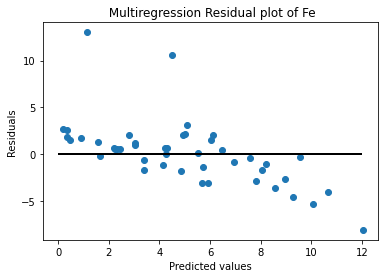

In [139]:
#residual plot of Fe in multiregression
residuals = y_test_fe-y_pred_fe
plt.scatter(y_pred_fe,residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title(' Multiregression Residual plot of Fe')
plt.hlines(y=0,xmin=0,xmax=12,linewidth=2,color='k')

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


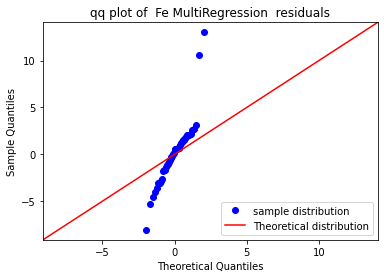

In [140]:
#qq plot of fe in muti regression
sm.qqplot(residuals, line ='45')
plt.title('qq plot of  Fe MultiRegression  residuals')
plt.legend(['sample distribution','Theoretical distribution'])

## Iteration for Cu

In [141]:
y_cu = prop_var.iloc[:, 1]
x = prop_var.iloc[:, 2:15]

x_train, x_test, y_train, y_test = train_test_split(x, y_cu, test_size = 0.2, random_state = 0)
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     Cu   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     27.72
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           7.63e-35
Time:                        21:30:20   Log-Likelihood:                -50.738
No. Observations:                 178   AIC:                             129.5
Df Residuals:                     164   BIC:                             174.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        307.8555    135.576      2.271      0.0

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [157]:
y_cu_iter1 = prop_var[['Fe', 'Cu', 'Silt', 'Sand', 'OCD', 'Nitrogen', 'CFVO', 'BDOD', 'pH', 'Clay', 'Cation', 'evi2020', 'sm_2020', 'st_2020']]

y_fe = y_cu_iter1.iloc[:, 0]
y_cu = y_cu_iter1.iloc[:, 1]
x = y_fe_iter1.iloc[:, 2:14]

x_train, x_test, y_train, y_test = train_test_split(x, y_cu, test_size = 0.2, random_state = 0)
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
model.summary()

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Cu   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     29.20
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           8.77e-35
Time:                        21:38:30   Log-Likelihood:                -52.812
No. Observations:                 178   AIC:                             131.6
Df Residuals:                     165   BIC:                             173.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        333.4221    136.118      2.450      0.015      64.665     602.180
Silt           0.0060      0.057      0.105      0.916      -0.106       0.118
Sand           0.0093      0.057      0.164      0.870      -0.103       0.122
OCD            0.0053      0.002      2.484      0.014       0.001       0.009
CFVO           0.0008      0.002      0.500      0.618      -0.002       0.004
BDOD          -0.0524      0.011     -4.713      0.000      -0.074      -0.030
SOC         3.256e-05      0.001      0.024      0.981      -0.003       0.003
pH             0.0392      0.022      1.753      0.082      -0.005       0.083
Clay           0.0051      0.057      0.089      0.929      -0.107       0.117
Cation         0.0113      0.002      4.640      0.000       0.006       0.016
evi2020    -3.006e-05   4.48e-05     -0.670      0.504      -0.000    5.85e-05
sm_2020     -218.8103     64.112     -3.413      0.001    -345.396     -92.225
st_2020       -0.9011      0.336     -2.684      0.008      -1.564      -0.238
==============================================================================
Omnibus:                        2.484   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                2.265
Skew:                          -0.118   Prob(JB):                        0.322
Kurtosis:                       3.500   Cond. No.                     2.21e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [156]:
y_cu_iter2 = prop_var[['Fe', 'Cu', 'Silt', 'Sand', 'OCD', 'Nitrogen', 'BDOD', 'pH', 'Clay', 'Cation', 'evi2020', 'sm_2020', 'st_2020']]

y_fe = y_cu_iter2.iloc[:, 0]
y_cu = y_cu_iter2.iloc[:, 1]
x = y_cu_iter2.iloc[:, 2:13]

x_train, x_test, y_train, y_test = train_test_split(x, y_cu, test_size = 0.2, random_state = 0)
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     Cu   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     33.16
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           2.30e-36
Time:                        21:37:42   Log-Likelihood:                -50.744
No. Observations:                 178   AIC:                             125.5
Df Residuals:                     166   BIC:                             163.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        304.6583    127.324      2.393      0.0

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [144]:
y_cu_iter3 = prop_var[['Fe', 'Cu', 'Silt', 'Sand', 'OCD', 'Nitrogen', 'BDOD', 'pH', 'Cation', 'evi2020', 'sm_2020', 'st_2020']]

y_fe = y_cu_iter3.iloc[:, 0]
y_cu = y_cu_iter3.iloc[:, 1]
x = y_cu_iter3.iloc[:, 2:12]

x_train, x_test, y_train, y_test = train_test_split(x, y_cu, test_size = 0.2, random_state = 0)
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     Cu   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     36.68
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           3.78e-37
Time:                        21:30:20   Log-Likelihood:                -50.771
No. Observations:                 178   AIC:                             123.5
Df Residuals:                     167   BIC:                             158.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        318.2546    111.730      2.848      0.0

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [145]:
y_cu_iter4 = prop_var[['Fe', 'Cu', 'Silt', 'Sand', 'OCD', 'Nitrogen', 'BDOD', 'pH', 'Cation', 'sm_2020', 'st_2020']]

y_fe = y_cu_iter4.iloc[:, 0]
y_cu = y_cu_iter4.iloc[:, 1]
x = y_cu_iter4.iloc[:, 2:11]

x_train, x_test, y_train, y_test = train_test_split(x, y_cu, test_size = 0.2, random_state = 0)
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     Cu   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     40.94
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           6.17e-38
Time:                        21:30:20   Log-Likelihood:                -50.855
No. Observations:                 178   AIC:                             121.7
Df Residuals:                     168   BIC:                             153.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        328.5827    108.401      3.031      0.0

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [146]:
"""
Last iteration for Cu
"""

y_cu_iter5 = prop_var[['Fe', 'Cu', 'Sand', 'OCD', 'Nitrogen', 'BDOD', 'pH', 'Cation', 'sm_2020', 'st_2020']]

y_fe = y_cu_iter5.iloc[:, 0]
y_cu = y_cu_iter5.iloc[:, 1]
x = y_cu_iter5.iloc[:, 2:10]

x_train, x_test, y_train, y_test_cu = train_test_split(x, y_cu, test_size = 0.2, random_state = 0)
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
model = sm.OLS(y_train, x_train).fit()
y_pred_cu=model.predict(x_test)
mse_test = sklearn.metrics.mean_squared_error(y_test_cu, y_pred_cu)
rmse_test = math.sqrt(mse_test)

print(rmse_test)
print(model.summary())

0.4341017192244081
                            OLS Regression Results                            
Dep. Variable:                     Cu   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     46.19
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           1.04e-38
Time:                        21:30:20   Log-Likelihood:                -51.043
No. Observations:                 178   AIC:                             120.1
Df Residuals:                     169   BIC:                             148.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        372.6765     79.156 

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


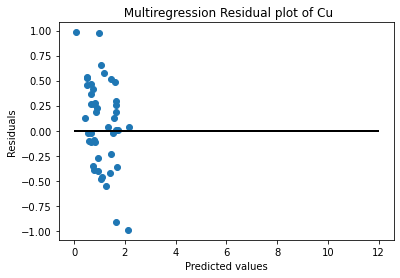

In [147]:
#residual plot of Cu in multiregression
residuals = y_test_cu-y_pred_cu
plt.scatter(y_pred_cu,residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title(' Multiregression Residual plot of Cu')
plt.hlines(y=0,xmin=0,xmax=12,linewidth=2,color='k')

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


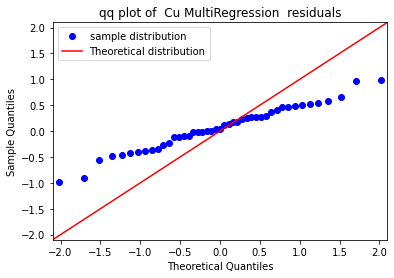

In [148]:
#qq plot of fe in muti regression
sm.qqplot(residuals, line ='45')
plt.title('qq plot of  Cu MultiRegression  residuals')
plt.legend(['sample distribution','Theoretical distribution'])

## Making Map for 2020 and 2021 for Cu and Fe

### Basic Functions

In [149]:
def read_one (path):
    #add the tif reading code here
    file_name = "/Users/saimanojappalla/Desktop/Quartile-2/SpatialDataQuality/ProjectV2/finalRasters/" + path
    dataset = gdal.Open(file_name)
    data = dataset.ReadAsArray()
    return data

# folder_path = "/Users/saimanojappalla/Desktop/Quartile-2/ScientificGeoComputing/Assignments/OPENCV/Python Geo-libraries (GDAL)/gdalExercise/images"

# def read_many(path):
#     images = []
#     for root , dirs , files in os.walk(path):
# #         print(files)
# #         print(path)
#         # **********************************************************
#         for file in files:
#             image = read_one(file)
#             images.append(image)
#         stack = np.dstack(np.array(images))
#         return stack, stack.shape

### Create Image arrays and stack

In [150]:
# bdod = read_one('raster_2020/bdod.tif')
# cation = read_one('raster_2020/cation.tif')
# cfvo = read_one('raster_2020/cfvo.tif')
# clay = read_one('raster_2020/clay.tif')
# nitrogen = read_one('raster_2020/nitrogen.tif')
# ocd = read_one('raster_2020/ocd.tif')
# ph = read_one('raster_2020/ph.tif')
# sand = read_one('raster_2020/sand.tif')
# silt = read_one('raster_2020/silt.tif')
# soc = read_one('raster_2020/soc.tif')

# # 2020
# evi_2020 = read_one('raster_2020/evi2020.tif')
# sm_2020 = read_one('raster_2020/sm_2020.tif')
# st_2020 = read_one('raster_2020/st_2020.tif')

# # 2021
# evi_2021 = read_one('raster_2021/evi2021.tif')
# sm_2021 = read_one('raster_2021/sm_2021.tif')
# st_2021 = read_one('raster_2021/st_2021.tif')

### Map of Cu and Fe for 2020

In [151]:
# Cu Prediction for 2020

images_cu_2020 = [sand, ocd, nitrogen, bdod, ph, cation, sm_2020, st_2020]
stack_cu_2020 = np.dstack(np.array(images_cu_2020))

cu_2020 = np.zeros((98,130))

for i in range(98):
    for j in range(130):
        if (stack_cu_2020[i][j][0] == 0 or stack_cu_2020[i][j][1] == 0 or stack_cu_2020[i][j][2] == 0 or stack_cu_2020[i][j][3] == 0 or \
            stack_cu_2020[i][j][4]==0 or stack_cu_2020[i][j][5]==0 or stack_cu_2020[i][j][6]==0 or stack_cu_2020[i][j][7]==0):
            cu_2020[i][j] = 0
        else:
            cu_2020[i][j] = 372.6765 + 0.0045*stack_cu_2020[i][j][0] + 0.005*stack_cu_2020[i][j][1] + \
            0.0003*stack_cu_2020[i][j][2] - 0.0415*stack_cu_2020[i][j][3] + 0.0498*stack_cu_2020[i][j][4] + \
            0.0118*stack_cu_2020[i][j][5] - 221.9158*stack_cu_2020[i][j][6] -1.0224*stack_cu_2020[i][j][7]

# cu_2020 = np.where((cu_2020 == 372.6765), np.nan, cu_2020)
# Convert numpy to raster
ds = gdal.Open('/Users/saimanojappalla/Desktop/Quartile-2/SpatialDataQuality/ProjectV2/finalRasters/raster_2020/bdod.tif')
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

driver = gdal.GetDriverByName('GTiff')
driver.Register()

outds = driver.Create('cu_2020_dsm.tif', xsize = 130, ysize = 98, bands = 1, eType = gdal.GDT_Float64)
outds.SetGeoTransform(gt)
outds.SetProjection(proj)
outband = outds.GetRasterBand(1)
outband.WriteArray(cu_2020)
outband.FlushCache()

outband = None
outds = None

# Fe Prediction for 2020

images_fe_2020 = [ocd, cfvo, ph, clay, cation, evi_2020, sm_2020, st_2020]
stack_fe_2020 = np.dstack(np.array(images_fe_2020))

fe_2020 = np.zeros((98,130))

for i in range(98):
    for j in range(130):
        if (stack_fe_2020[i][j][0] == 0 or stack_fe_2020[i][j][1] == 0 or stack_fe_2020[i][j][2] == 0 or stack_fe_2020[i][j][3] == 0 or \
            stack_fe_2020[i][j][4]==0 or stack_fe_2020[i][j][5]==0 or stack_fe_2020[i][j][6]==0 or stack_fe_2020[i][j][7]==0):
            fe_2020[i][j] = 0
        else:
            fe_2020[i][j] = 2114.365 + 0.0604*stack_fe_2020[i][j][0] + 0.0785*stack_fe_2020[i][j][1] + \
            0.9457*stack_fe_2020[i][j][2] + 0.0568*stack_fe_2020[i][j][3] + 0.0504*stack_fe_2020[i][j][4] + \
            0.0021*stack_fe_2020[i][j][5] - 1072.0931*stack_fe_2020[i][j][6] - 6.3462*stack_fe_2020[i][j][7]

# cu_2020 = np.where((cu_2020 == 372.6765), np.nan, cu_2020)
# Convert numpy to raster
ds = gdal.Open('/Users/saimanojappalla/Desktop/Quartile-2/SpatialDataQuality/ProjectV2/finalRasters/raster_2020/bdod.tif')
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

driver = gdal.GetDriverByName('GTiff')
driver.Register()

outds = driver.Create('fe_2020_dsm.tif', xsize = 130, ysize = 98, bands = 1, eType = gdal.GDT_Float64)
outds.SetGeoTransform(gt)
outds.SetProjection(proj)
outband = outds.GetRasterBand(1)
outband.WriteArray(fe_2020)
outband.FlushCache()

outband = None
outds = None

NameError: name 'sand' is not defined

### Map of Cu and Fe for 2021

In [ ]:
# Cu Prediction for 2021

images_cu_2021 = [sand, ocd, nitrogen, bdod, ph, cation, sm_2021, st_2021]
stack_cu_2021 = np.dstack(np.array(images_cu_2021))

cu_2021 = np.zeros((98,130))

for i in range(98):
    for j in range(130):
        if (stack_cu_2021[i][j][0] == 0 or stack_cu_2021[i][j][1] == 0 or stack_cu_2021[i][j][2] == 0 or stack_cu_2021[i][j][3] == 0 or \
            stack_cu_2021[i][j][4]==0 or stack_cu_2021[i][j][5]==0 or stack_cu_2021[i][j][6]==0 or stack_cu_2021[i][j][7]==0):
            cu_2021[i][j] = 0
        else:
            cu_2021[i][j] = 372.6765 + 0.0045*stack_cu_2021[i][j][0] + 0.005*stack_cu_2021[i][j][1] + \
            0.0003*stack_cu_2021[i][j][2] - 0.0415*stack_cu_2021[i][j][3] + 0.0498*stack_cu_2021[i][j][4] + \
            0.0118*stack_cu_2021[i][j][5] - 221.9158*stack_cu_2021[i][j][6] -1.0224*stack_cu_2021[i][j][7]

# cu_2020 = np.where((cu_2020 == 372.6765), np.nan, cu_2020)
# Convert numpy to raster
ds = gdal.Open('/Users/saimanojappalla/Desktop/Quartile-2/SpatialDataQuality/ProjectV2/finalRasters/raster_2020/bdod.tif')
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

driver = gdal.GetDriverByName('GTiff')
driver.Register()

outds = driver.Create('cu_2021_dsm.tif', xsize = 130, ysize = 98, bands = 1, eType = gdal.GDT_Float64)
outds.SetGeoTransform(gt)
outds.SetProjection(proj)
outband = outds.GetRasterBand(1)
outband.WriteArray(cu_2021)
outband.FlushCache()

outband = None
outds = None

# Fe Prediction for 2021

images_fe_2021 = [ocd, cfvo, ph, clay, cation, evi_2021, sm_2021, st_2021]
stack_fe_2021 = np.dstack(np.array(images_fe_2021))

fe_2021 = np.zeros((98,130))

for i in range(98):
    for j in range(130):
        if (stack_fe_2021[i][j][0] == 0 or stack_fe_2021[i][j][1] == 0 or stack_fe_2021[i][j][2] == 0 or stack_fe_2021[i][j][3] == 0 or \
            stack_fe_2021[i][j][4]==0 or stack_fe_2021[i][j][5]==0 or stack_fe_2021[i][j][6]==0 or stack_fe_2021[i][j][7]==0):
            fe_2021[i][j] = 0
        else:
            fe_2021[i][j] = 2114.365 + 0.0604*stack_fe_2021[i][j][0] + 0.0785*stack_fe_2021[i][j][1] + \
            0.9457*stack_fe_2021[i][j][2] + 0.0568*stack_fe_2021[i][j][3] + 0.0504*stack_fe_2021[i][j][4] + \
            0.0021*stack_fe_2021[i][j][5] - 1072.0931*stack_fe_2021[i][j][6] - 6.3462*stack_fe_2021[i][j][7]

# cu_2020 = np.where((cu_2020 == 372.6765), np.nan, cu_2020)
# Convert numpy to raster
ds = gdal.Open('/Users/saimanojappalla/Desktop/Quartile-2/SpatialDataQuality/ProjectV2/finalRasters/raster_2020/bdod.tif')
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

driver = gdal.GetDriverByName('GTiff')
driver.Register()

outds = driver.Create('fe_2021_dsm.tif', xsize = 130, ysize = 98, bands = 1, eType = gdal.GDT_Float64)
outds.SetGeoTransform(gt)
outds.SetProjection(proj)
outband = outds.GetRasterBand(1)
outband.WriteArray(fe_2021)
outband.FlushCache()

outband = None
outds = None

## Scatter Plots

In [ ]:
x_scatter = prop_var.iloc[:, 2:15]
y_fe_scatter = prop_var.iloc[:, 0]
y_cu_scatter = prop_var.iloc[:, 1]

import seaborn as sns
sns.pairplot(prop_var,x_vars=['Silt', 'Sand', 'OCD', 'Nitrogen', 'CFVO', 'BDOD', 'SOC', 'pH', 'Clay', 'Cation', 'evi2020', 'sm_2020', 'st_2020'], y_vars=['Fe', 'Cu'])

## Linear Regression

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.40842527819871716
                            OLS Regression Results                            
Dep. Variable:                     Cu   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     142.7
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           1.81e-24
Time:                        22:08:32   Log-Likelihood:                -101.35
No. Observations:                 178   AIC:                             206.7
Df Residuals:                     176   BIC:                             213.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9701      0.435

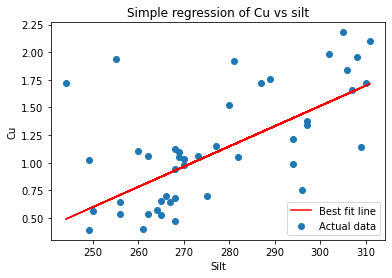

In [158]:
#Cu simple regression with silt
y_cu=prop_var['Cu']
x=prop_var['Silt']
x_train, x_test, y_train, y_test_cu_silt = train_test_split(x, y_cu, test_size = 0.2, random_state = 0)
x_train = sm.add_constant(x_train)
X_test=x_test
x_test = sm.add_constant(x_test)
model = sm.OLS(y_train, x_train).fit()
y_pred_cu_silt=model.predict(x_test)
mse_test = sklearn.metrics.mean_squared_error(y_test_cu_silt, y_pred_cu_silt)
rmse_test = math.sqrt(mse_test)
print(rmse_test)
plt.scatter(X_test,y_test_cu_silt)
plt.plot(X_test,y_pred_cu_silt,color='r')
plt.xlabel('Silt')
plt.ylabel('Cu')
plt.title('Simple regression of Cu vs silt')
plt.legend(['Best fit line','Actual data'])
print(model.summary())

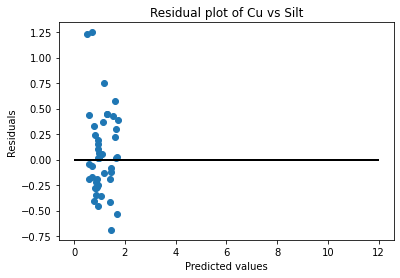

In [159]:
#residual plot of Cu and silt
residuals = y_test_cu_silt-y_pred_cu_silt
plt.scatter(y_pred_cu_silt,residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot of Cu vs Silt')
plt.hlines(y=0,xmin=0,xmax=12,linewidth=2,color='k')

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


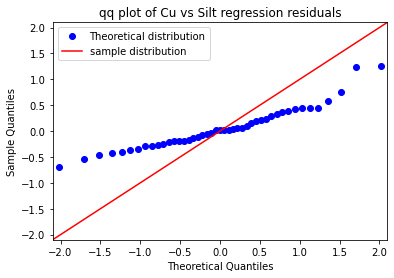

In [160]:
#qq plot of Cu and silt
sm.qqplot(residuals, line ='45')
plt.title('qq plot of Cu vs Silt regression residuals')
plt.legend(['Theoretical distribution','sample distribution'])

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.4493445100376358
                            OLS Regression Results                            
Dep. Variable:                     Cu   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     84.82
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           9.65e-17
Time:                        22:08:33   Log-Likelihood:                -119.18
No. Observations:                 178   AIC:                             242.4
Df Residuals:                     176   BIC:                             248.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8529      0.551 

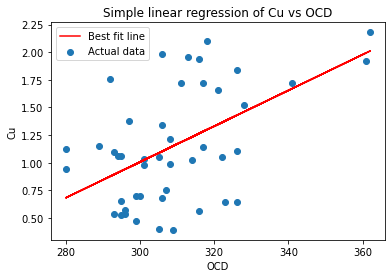

In [161]:
#Cu simple regression with OCD
y_cu=prop_var['Cu']
x=prop_var['OCD']
x_train, x_test, y_train, y_test_cu_ocd = train_test_split(x, y_cu, test_size = 0.2, random_state = 0)
x_train = sm.add_constant(x_train)
X_test=x_test
x_test = sm.add_constant(x_test)
model = sm.OLS(y_train, x_train).fit()
y_pred_cu_ocd=model.predict(x_test)
mse_test = sklearn.metrics.mean_squared_error(y_test_cu_ocd, y_pred_cu_ocd)
rmse_test = math.sqrt(mse_test)
print(rmse_test)
plt.scatter(X_test,y_test_cu_ocd)
plt.plot(X_test,y_pred_cu_ocd,color='r')
plt.xlabel('OCD')
plt.ylabel('Cu')
plt.title('Simple linear regression of Cu vs OCD')
plt.legend(['Best fit line','Actual data'])
print(model.summary())

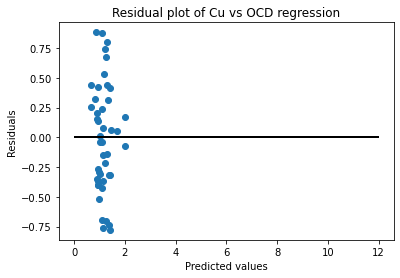

In [162]:
#residual plot of Cu and OCD
residuals = y_test_cu_ocd-y_pred_cu_ocd
plt.scatter(y_pred_cu_ocd,residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot of Cu vs OCD regression')
plt.hlines(y=0,xmin=0,xmax=12,linewidth=2,color='k')

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


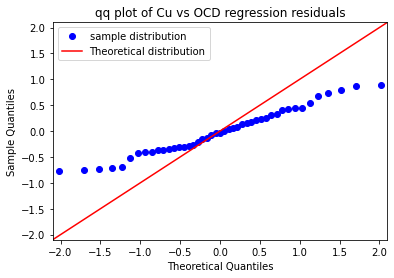

In [163]:
#qq plot of Cu and OCD 
sm.qqplot(residuals, line ='45')
plt.title('qq plot of Cu vs OCD regression residuals')
plt.legend(['sample distribution','Theoretical distribution'])

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.4719858107958162
                            OLS Regression Results                            
Dep. Variable:                     Cu   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     24.33
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           1.87e-06
Time:                        22:08:34   Log-Likelihood:                -142.67
No. Observations:                 178   AIC:                             289.3
Df Residuals:                     176   BIC:                             295.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1991      0.210 

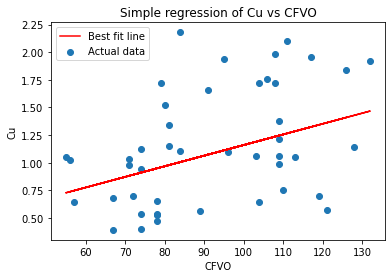

In [164]:
#Cu simple regression with CFVO
y_cu=prop_var['Cu']
x=prop_var['CFVO']
x_train, x_test, y_train, y_test_cu_cfvo = train_test_split(x, y_cu, test_size = 0.2, random_state = 0)
x_train = sm.add_constant(x_train)
X_test=x_test
x_test = sm.add_constant(x_test)
model = sm.OLS(y_train, x_train).fit()
y_pred_cu_cfvo=model.predict(x_test)
mse_test = sklearn.metrics.mean_squared_error(y_test_cu_cfvo, y_pred_cu_cfvo)
rmse_test = math.sqrt(mse_test)
print(rmse_test)
plt.scatter(X_test,y_test_cu_cfvo)
plt.plot(X_test,y_pred_cu_cfvo,color='r')
plt.xlabel('CFVO')
plt.ylabel('Cu')
plt.title('Simple regression of Cu vs CFVO')
plt.legend(['Best fit line','Actual data'])
print(model.summary())

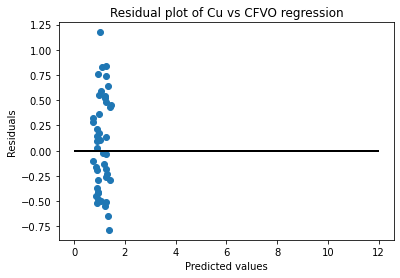

In [165]:
#residual plot of Cu and CFVO
residuals = y_test_cu_cfvo-y_pred_cu_cfvo
plt.scatter(y_pred_cu_cfvo,residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot of Cu vs CFVO regression')
plt.hlines(y=0,xmin=0,xmax=12,linewidth=2,color='k')

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


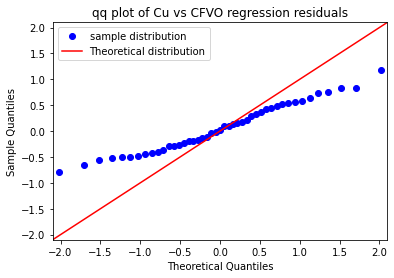

In [166]:
#qq plot of Cu and CFVO 
sm.qqplot(residuals, line ='45')
plt.title('qq plot of Cu vs CFVO regression residuals')
plt.legend(['sample distribution','Theoretical distribution'])

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.4036349716667455
                            OLS Regression Results                            
Dep. Variable:                     Cu   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     85.21
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           8.45e-17
Time:                        22:08:35   Log-Likelihood:                -119.05
No. Observations:                 178   AIC:                             242.1
Df Residuals:                     176   BIC:                             248.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1454      0.536 

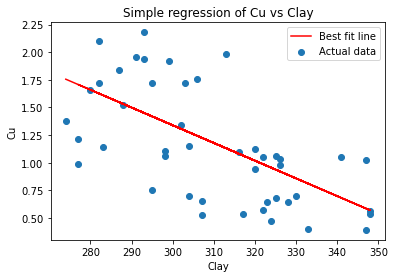

In [167]:
#Cu simple regression with clay
y_cu=prop_var['Cu']
x=prop_var['Clay']
x_train, x_test, y_train, y_test_cu_clay = train_test_split(x, y_cu, test_size = 0.2, random_state = 0)
x_train = sm.add_constant(x_train)
X_test=x_test
x_test = sm.add_constant(x_test)
model = sm.OLS(y_train, x_train).fit()
y_pred_cu_clay=model.predict(x_test)
mse_test = sklearn.metrics.mean_squared_error(y_test_cu_clay, y_pred_cu_clay)
rmse_test = math.sqrt(mse_test)
print(rmse_test)
plt.scatter(X_test,y_test_cu_clay)
plt.plot(X_test,y_pred_cu_clay,color='r')
plt.xlabel('Clay')
plt.ylabel('Cu')
plt.title('Simple regression of Cu vs Clay')
plt.legend(['Best fit line','Actual data'])
print(model.summary())


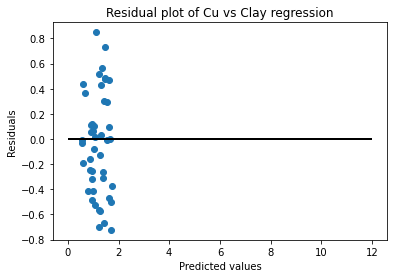

In [168]:
#residual plot of copper and clay
residuals = y_test_cu_clay-y_pred_cu_clay
plt.scatter(y_pred_cu_clay,residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot of Cu vs Clay regression')
plt.hlines(y=0,xmin=0,xmax=12,linewidth=2,color='k')

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


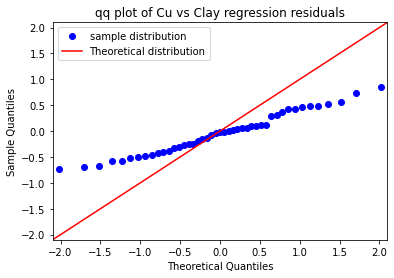

In [169]:
#qq plot of Cu and clay in regression
sm.qqplot(residuals, line ='45')
plt.title('qq plot of Cu vs Clay regression residuals')
plt.legend(['sample distribution','Theoretical distribution'])

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.46481598679863295
                            OLS Regression Results                            
Dep. Variable:                     Cu   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     74.13
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           4.02e-15
Time:                        22:08:35   Log-Likelihood:                -122.91
No. Observations:                 178   AIC:                             249.8
Df Residuals:                     176   BIC:                             256.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3519      0.647

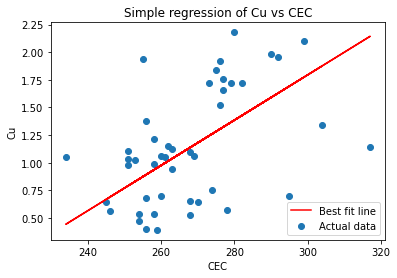

In [170]:
#Cu simple regression with CEC
y_cu=prop_var['Cu']
x=prop_var['Cation']
x_train, x_test, y_train, y_test_cu_cec = train_test_split(x, y_cu, test_size = 0.2, random_state = 0)
x_train = sm.add_constant(x_train)
X_test=x_test
x_test = sm.add_constant(x_test)
model = sm.OLS(y_train, x_train).fit()
y_pred_cu_cec=model.predict(x_test)
mse_test = sklearn.metrics.mean_squared_error(y_test_cu_cec, y_pred_cu_cec)
rmse_test = math.sqrt(mse_test)
print(rmse_test)
plt.scatter(X_test,y_test_cu_cec)
plt.plot(X_test,y_pred_cu_cec,color='r')
plt.xlabel('CEC')
plt.ylabel('Cu')
plt.title('Simple regression of Cu vs CEC')
plt.legend(['Best fit line','Actual data'])
print(model.summary())

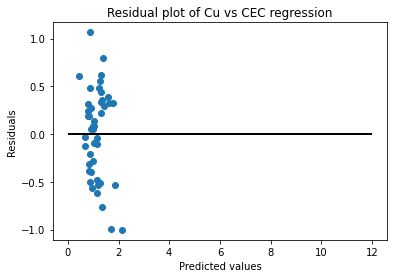

In [171]:
#residual plot of copper and CEC
residuals = y_test_cu_cec-y_pred_cu_cec
plt.scatter(y_pred_cu_cec,residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot of Cu vs CEC regression')
plt.hlines(y=0,xmin=0,xmax=12,linewidth=2,color='k')

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


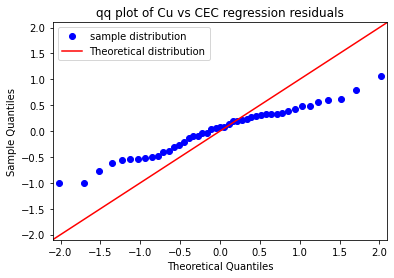

In [172]:
#qq plot of Cu and CEC 
sm.qqplot(residuals, line ='45')
plt.title('qq plot of Cu vs CEC regression residuals')
plt.legend(['sample distribution','Theoretical distribution'])

3.142490931114102
                            OLS Regression Results                            
Dep. Variable:                     Fe   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     66.02
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           7.60e-14
Time:                        22:08:36   Log-Likelihood:                -474.47
No. Observations:                 178   AIC:                             952.9
Df Residuals:                     176   BIC:                             959.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0510      1.351  

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


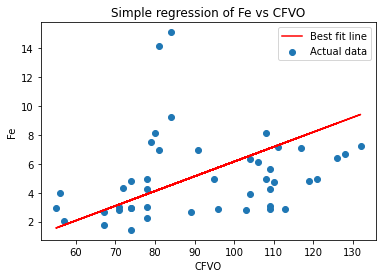

In [173]:
#Fe simple regression with CFVO
y_Fe=prop_var['Fe']
x=prop_var['CFVO']
x_train, x_test, y_train, y_test_fe_cfvo = train_test_split(x, y_Fe, test_size = 0.2, random_state = 0)
x_train = sm.add_constant(x_train)
X_test=x_test
x_test = sm.add_constant(x_test)

model = sm.OLS(y_train, x_train).fit()
y_pred_fe_cfvo=model.predict(x_test)
mse_test = sklearn.metrics.mean_squared_error(y_test_fe_cfvo, y_pred_fe_cfvo)
rmse_test = math.sqrt(mse_test)
print(rmse_test)
plt.scatter(X_test,y_test_fe_cfvo)
plt.plot(X_test,y_pred_fe_cfvo,color='r')
plt.xlabel('CFVO')
plt.ylabel('Fe')
plt.title('Simple regression of Fe vs CFVO')
plt.legend(['Best fit line','Actual data'])
print(model.summary())

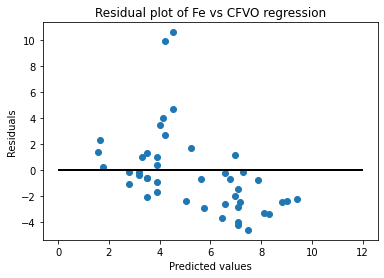

In [174]:
#residual plot of Fe and CFVO
residuals = y_test_fe_cfvo-y_pred_fe_cfvo
plt.scatter(y_pred_fe_cfvo,residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot of Fe vs CFVO regression')
plt.hlines(y=0,xmin=0,xmax=12,linewidth=2,color='k')

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


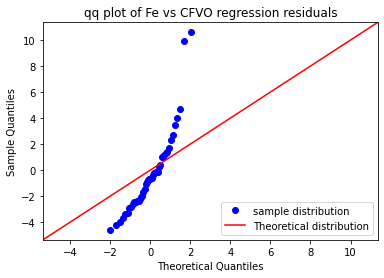

In [175]:
#qq plot of Fe and CFVO 
sm.qqplot(residuals, line ='45')
plt.title('qq plot of Fe vs CFVO regression residuals')
plt.legend(['sample distribution','Theoretical distribution'])

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


2.9984221487480194
                            OLS Regression Results                            
Dep. Variable:                     Fe   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     36.11
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           1.05e-08
Time:                        22:08:37   Log-Likelihood:                -486.21
No. Observations:                 178   AIC:                             976.4
Df Residuals:                     176   BIC:                             982.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.1803      4.984 

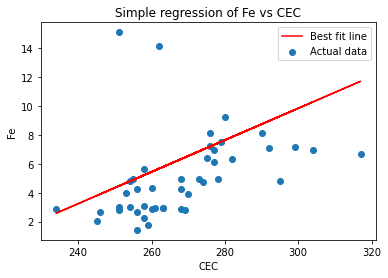

In [176]:
#Fe simple regression with CEC
y_Fe=prop_var['Fe']
x=prop_var['Cation']
x_train, x_test, y_train, y_test_fe_cec = train_test_split(x, y_Fe, test_size = 0.2, random_state = 0)
x_train = sm.add_constant(x_train)
X_test=x_test
x_test = sm.add_constant(x_test)
model = sm.OLS(y_train, x_train).fit()
y_pred_fe_cec=model.predict(x_test)
mse_test = sklearn.metrics.mean_squared_error(y_test_fe_cec, y_pred_fe_cec)
rmse_test = math.sqrt(mse_test)
print(rmse_test)
plt.scatter(X_test,y_test_fe_cec)
plt.plot(X_test,y_pred_fe_cec,color='r')
plt.xlabel('CEC')
plt.ylabel('Fe')
plt.title('Simple regression of Fe vs CEC')
plt.legend(['Best fit line','Actual data'])
print(model.summary())

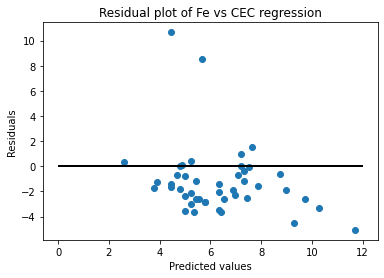

In [177]:
#residual plot of Fe and CEC
residuals = y_test_fe_cec-y_pred_fe_cec
plt.scatter(y_pred_fe_cec,residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot of Fe vs CEC regression')
plt.hlines(y=0,xmin=0,xmax=12,linewidth=2,color='k')

C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


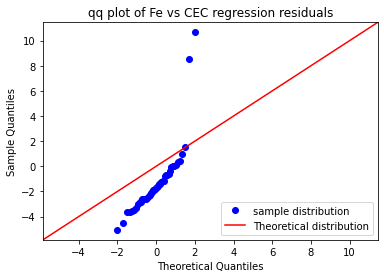

In [178]:
#qq plot of Fe and CEC in muti regression
sm.qqplot(residuals, line ='45')
plt.title('qq plot of Fe vs CEC regression residuals')
plt.legend(['sample distribution','Theoretical distribution'])

## DSM MAPS FOR LINEAR REGRESSION

In [179]:
# Prediction of Copper using Clay

# Cu Prediction for 2020

cu_2020 = np.zeros((98,130))

for i in range(98):
    for j in range(130):
        if (clay[i][j]==0):
            cu_2020[i][j] = 0
        else:
            cu_2020[i][j] = 6.1454 - 0.0160*clay[i][j]

# cu_2020 = np.where((cu_2020 == 372.6765), np.nan, cu_2020)
# Convert numpy to raster
ds = gdal.Open('/Users/saimanojappalla/Desktop/Quartile-2/SpatialDataQuality/ProjectV2/finalRasters/raster_2020/bdod.tif')
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

driver = gdal.GetDriverByName('GTiff')
driver.Register()

outds = driver.Create('cu_2020_dsm_lr.tif', xsize = 130, ysize = 98, bands = 1, eType = gdal.GDT_Float64)
outds.SetGeoTransform(gt)
outds.SetProjection(proj)
outband = outds.GetRasterBand(1)
outband.WriteArray(cu_2020)
outband.FlushCache()

outband = None
outds = None

# Prediction of Fe with Cation

fe_2020 = np.zeros((98,130))

for i in range(98):
    for j in range(130):
        if (cation[i][j]==0):
            fe_2020[i][j] = 0
        else:
            fe_2020[i][j] = -23.1803 + 0.1101*cation[i][j] 

# cu_2020 = np.where((cu_2020 == 372.6765), np.nan, cu_2020)
# Convert numpy to raster
ds = gdal.Open('/Users/saimanojappalla/Desktop/Quartile-2/SpatialDataQuality/ProjectV2/finalRasters/raster_2020/bdod.tif')
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

driver = gdal.GetDriverByName('GTiff')
driver.Register()

outds = driver.Create('fe_2020_dsm_lr.tif', xsize = 130, ysize = 98, bands = 1, eType = gdal.GDT_Float64)
outds.SetGeoTransform(gt)
outds.SetProjection(proj)
outband = outds.GetRasterBand(1)
outband.WriteArray(fe_2020)
outband.FlushCache()

outband = None
outds = None

NameError: name 'clay' is not defined